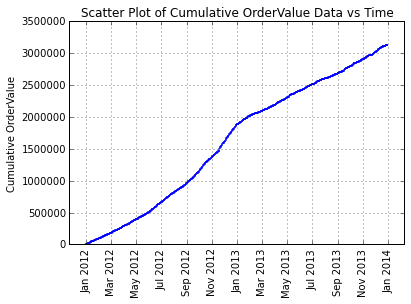

In [166]:
# Import modules 
import matplotlib as mpl
import numpy as np 
import pandas as pd 
import datetime
from sklearn import cluster
from matplotlib import pyplot as plt 
from scipy.spatial.distance import cdist, pdist
import datetime

# Make plots in Notebook
%matplotlib inline

# Load transaction data
df_trans = pd.read_csv('/Users/mikeallimb/Documents/Data_science/Farfetch/data_science_task/user_transactions.csv', 
                 header=0 ,sep=",")

df_trans['OrderDate_GMT'] = pd.to_datetime(df_trans['OrderDate_GMT'])
df_trans_dat = df_trans.sort(columns=['OrderDate_GMT','UserID'])
df_trans_dat_sum = df_trans_dat.groupby(['OrderDate_GMT']).sum()
df_trans_dat_sum['Cum_Order'] = df_trans_dat_sum['OrderValue'].cumsum()
x_data = (df_trans_dat_sum.index -  df_trans_dat_sum.index[0]).days.reshape(-1, 1)
y_data = df_trans_dat_sum['Cum_Order'].values

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df_trans_dat_sum.index, df_trans_dat_sum['Cum_Order'], color='blue', s=0.5)
plt.xticks(rotation='vertical')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.ylim([0,3500000])
plt.grid(True)
plt.ylabel('Cumulative OrderValue')
plt.title('Scatter Plot of Cumulative OrderValue Data vs Time')

In [167]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_data, y_data)
print(model)

# The coefficients
print('Coefficients: \n', model.coef_)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
('Coefficients: \n', array([ 4637.40537811]))


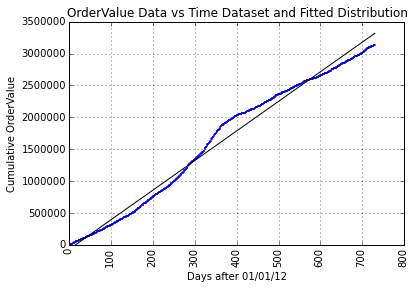

In [168]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data, color='blue', s=0.5)
ax.plot(x_data, model.predict(x_data), color='black')
plt.xticks(rotation='vertical')
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.ylim([0,3500000])
plt.grid(True)
plt.ylabel('Cumulative OrderValue')
plt.xlabel('Days after 01/01/12')
plt.xlim([0,800])
plt.title('OrderValue Data vs Time Dataset and Fitted Distribution')

In [199]:
OrderValue_730_actual = df_trans_dat_sum['Cum_Order'].tail(1)

Difference_Actual_Predict_730 = OrderValue_730_actual.values - model.predict(730)
#Difference_Actual_Predict_730

Predicted_1095 = model.predict(1095)
#Predicted_1095

Total_spend_2014 = Predicted_1095 - OrderValue_730_actual.values
Total_spend_2014


array([ 1875892.44495607])

In [209]:
# Load transaction data
df_user = pd.read_csv('/Users/mikeallimb/Documents/Data_science/Farfetch/data_science_task/user_dat.csv', 
                 header=0, sep=",")
df_user['SubscribeDate'] = pd.to_datetime(df_user['SubscribeDate'])
df_user[:5]

,UserID,Birthday,IsSubscribed,SubscribeDate,GenderFinal,IsVIP,HasUsedWishlist,IsUsingMultipleDevices,SK_GeoCountry
0,4527721,NaN,Yes,2012-12-12 13:52:28.757,N/D,Not VIP,No,No,216
1,4533703,NaN,Yes,2012-12-12 21:18:53.220,N/D,Not VIP,No,No,216
2,4542738,NaN,No,NaT,N/D,Not VIP,No,No,29
3,4545905,NaN,No,NaT,Women,Not VIP,Yes,Yes,216
4,4526387,1988-05-28,Yes,2015-06-25 05:37:32.363,Women,Not VIP,Yes,No,29


In [238]:
df_user = df_user.dropna(subset=['SubscribeDate'])
df_user = df_user.sort(columns=['SubscribeDate'])
df_user[:5]

,UserID,Birthday,IsSubscribed,SubscribeDate,GenderFinal,IsVIP,HasUsedWishlist,IsUsingMultipleDevices,SK_GeoCountry
647,254460,1981-11-09,Yes,2008-10-09 20:02:26.580,Women,Not VIP,Yes,Yes,215
2281,997954,NaN,Yes,2008-11-25 10:21:14.477,Women,Not VIP,Yes,No,98
4900,2694965,NaN,Yes,2008-12-10 12:10:15.033,Women,Not VIP,Yes,No,167
262,6482,NaN,Yes,2009-02-02 17:55:18.520,Women,Not VIP,No,No,13
303,10834,NaN,Yes,2009-02-23 15:41:59.090,Women,Not VIP,Yes,No,70


In [288]:
# Is Subscribed
test_sub_1 = df_user[((df_user['SubscribeDate'] >= '2012-01') & (df_user['SubscribeDate'] <= '2012-12')) \
                     & (df_user['IsSubscribed'] == 'Yes' )]
test_sub_2 = df_user[((df_user['SubscribeDate'] >= '2013-01') & (df_user['SubscribeDate'] <= '2013-12')) \
                     & (df_user['IsSubscribed'] == 'Yes' )]
test_sub_3 = df_user[((df_user['SubscribeDate'] >= '2014-01') & (df_user['SubscribeDate'] <= '2014-12')) \
                     & (df_user['IsSubscribed'] == 'Yes' )]
print(test_sub_1.shape)
print(test_sub_2.shape)
print(test_sub_3.shape)

# Is VIP 
test_vip_1 = df_user[((df_user['SubscribeDate'] >= '2012-01') & (df_user['SubscribeDate'] <= '2012-12')) \
                     & (df_user['IsVIP'] == 'VIP' )]
test_vip_2 = df_user[((df_user['SubscribeDate'] >= '2013-01') & (df_user['SubscribeDate'] <= '2013-12')) \
                     & (df_user['IsVIP'] == 'VIP' )]
test_vip_3 = df_user[((df_user['SubscribeDate'] >= '2014-01') & (df_user['SubscribeDate'] <= '2014-12')) \
                     & (df_user['IsVIP'] == 'VIP' )]
print(test_vip_1.shape)
print(test_vip_2.shape)
print(test_vip_3.shape)

# Uses Wishlist 
test_vip_1 = df_user[((df_user['SubscribeDate'] >= '2012-01') & (df_user['SubscribeDate'] <= '2012-12')) \
                     & (df_user['HasUsedWishlist'] == 'Yes' )]
test_vip_2 = df_user[((df_user['SubscribeDate'] >= '2013-01') & (df_user['SubscribeDate'] <= '2013-12')) \
                     & (df_user['HasUsedWishlist'] == 'Yes' )]
test_vip_3 = df_user[((df_user['SubscribeDate'] >= '2014-01') & (df_user['SubscribeDate'] <= '2014-12')) \
                     & (df_user['HasUsedWishlist'] == 'Yes' )]
print(test_vip_1.shape)
print(test_vip_2.shape)
print(test_vip_3.shape)

(2584, 9)
(70, 9)
(85, 9)
(29, 9)
(5, 9)
(4, 9)
(907, 9)
(42, 9)
(51, 9)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
('Coefficients: \n', array([ 3323.41884106]))


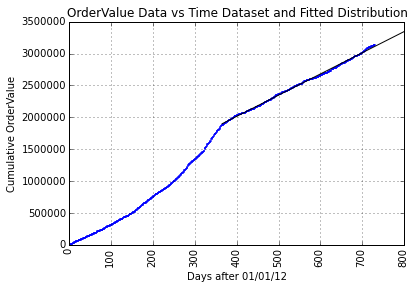

In [319]:
# Select only 2013 data
df_2013 = df_trans_dat_sum.tail(365)

# Prepare datasets for linear regression
x_data_2013 = (df_2013.index -  df_2013.index[0]).days.reshape(-1, 1)
y_data_2013 = df_2013['Cum_Order'].values

from sklearn.linear_model import LinearRegression
model_2013 = LinearRegression()
model_2013.fit(x_data_2013, y_data_2013)
print(model_2013)

# The coefficients
print('Coefficients: \n', model_2013.coef_)
# Add cumulative value for 2012 
x_data_2013_shift = x_data + 365

# Plot 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data, color='blue', s=0.5)
ax.plot(x_data_2013_shift, model_2013.predict(x_data), color='black')
plt.xticks(rotation='vertical')
#ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
plt.ylim([0,3500000])
plt.grid(True)
plt.ylabel('Cumulative OrderValue')
plt.xlabel('Days after 01/01/12')
plt.xlim([0,800])
plt.title('OrderValue Data vs Time Dataset and Fitted Distribution')

In [325]:
df_trans_dat_sum.tail(366)

Predicted_730 = model_2013.predict(730)

Total_spend_2014 = Predicted_730 - OrderValue_730_actual.values
Total_spend_2014

array([ 1190948.29791491])